<a href="https://colab.research.google.com/github/rinivarg/ReproRehab2024-Pod3/blob/main/Materials/Week%202/Week%202%20-%20Codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Importing Data

## Clear the entire workspace

In [1]:
rm(list=ls())

## Load required libraries

In [5]:
ReqdLibs = c("here", "purrr", "readxl", "Hmisc", "chron", 
			 "ggplot2", "ggthemes", "dplyr")
invisible(lapply(ReqdLibs, library, character.only = TRUE))

## Theme defaults
This is only for the Jupyter Notebook so you the figures axes are larger

In [6]:
thm <- theme(strip.text.x = element_text(size = 20, face = "bold"),
             strip.text.y = element_text(size = 20, face = "bold"),
             legend.text = element_text(size = 16, face = "bold"),
             legend.position = "top",
             legend.title = element_text(size = 16, face = "bold"),
             title = element_text(size = 14, face = "bold"),
             text = element_text(colour = "black", size = 18),
             plot.title = element_text(colour = "black", size = 22, face = "bold"), # nolint
             axis.ticks.length = unit(0.3, "cm"),
             axis.line = element_line(colour = "black", linewidth = 0.85),
             axis.ticks = element_line(colour = "black", linewidth = 0.85),
             axis.text = element_text(colour = "black", size = 24),
             axis.title = element_text(size = 25))

## Retrieve the folder path to the data files, a.k.a, the *Root Folder*
Note that this section is slightly different from the R project folder because the Jupyter notebook is outside teh R project folder and is read within the root folder `ReproRehab_Bootcamp` so we are going to need to direct it to the `Materials/Week 2/R project` folder.



In [7]:
folder_path = here("Materials/Week 2/R project", "Raw Data")
# output the folder name
print(folder_path)
# make sure it exists
dir.exists(folder_path)


[1] "/Users/rinivarghese/Documents/My Documents/JHU/Lab/Professional Development/ReproRehab/02_Bootcamp/ReproRehab_Bootcamp/Materials/Week 2/R project/Raw Data"


[1] TRUE

## What subfolders and files are within the root folder? Let's check.
OK, once we have the *'folder path'* to the root folder, i.e., `Raw Data`, it is important to know exactly what the structure within is. <br> In our case, the structure looks something like this:<br><br>
    `Raw Data/` <br>
    `├── sub1/` <br>
    `│   ├── sub1_rest.xlsx` <br>
    `│   ├── sub1_trial1.xlsx` <br>
    `│   ├── sub1_trial2.xlsx` <br>
    `│   └── ...`<br>
    `├── sub2/` <br>
    `│   ├── sub2_rest.xlsx` <br>
    `│   ├── sub2_trial1.xlsx` <br>
    `│   ├── sub2_trial2.xlsx` <br>
    `│   └── ...`<br>
    `├── sub3/`<br>
    `│   ├── sub3_rest.xlsx` <br>
    `│   ├── sub3_trial1.xlsx` <br>
    `│   ├── sub3_trial2.xlsx` <br>
    `│   └── ...`<br>
    `└── ...`<br>


In [8]:
options(warn=0)
subfolder_path = here(folder_path,'Sub1')

files.test=list.files(subfolder_path)
files.test

#Let's read in one file to see how ugly the data are
temp0=suppressMessages(read_excel(here(subfolder_path,files.test[1]),))
head(temp0)

[1] "Sub1_rest.xlsx"   "Sub1_trial1.xlsx" "Sub1_trial2.xlsx" "Sub1_trial3.xlsx"
[5] "Sub1_trial4.xlsx" "Sub1_trial5.xlsx" "Sub1_trial6.xlsx"

ID code:,11,...3,Test number:,88,...6,Barometric press. (mmHg):,750,...9,t,⋯,BR,O2 Cost,EEtot,IC,Step,LogVE,P(A-a)O2,User 1,User 2,User 3
<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Last name:,SUBJECT,NA,Test date:,6/21/2017,NA,Temperature (degrees C):,22,NA,hh:mm:ss,⋯,%,ml/Kg/m,Kcal,l,#,l/min,Kpa,---,---,---
First name:,NO1,NA,Test time:,10:16,NA,Humidity;%,50,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Sex:,M,NA,N. of steps:,53,NA,Temp. flowm. (degrees C):,34,NA,00:00:02,⋯,92,0,0,0,1,1.1454686564195442,19.61348207,0,0,0
Age:,26,NA,Duration (hh:mm:ss):,00:02:59,NA,Humidity flowm.;%,100,NA,00:00:05,⋯,93,0,3.7885775056101641E-2,0,2,1.065215743354984,19.61348207,0,0,0
Height (in):,72.834645669291334,NA,BSA (m^2):,2.1000404912839743,NA,STPD:,0.81451179368695192,NA,00:00:08,⋯,93,0,0.11936544607175556,0,3,1.1096921434019635,19.61348207,0,0,0
Weight (lb):,189.59770013580487,NA,BMI (Kg/m^2):,25.127830533235937,NA,BTPS insp:,1.1064019328669148,NA,00:00:10,⋯,89,0,0.19953530737132827,0,4,1.3005094485724247,19.61348207,0,0,0


## So, as you see above, the data are quite messy
we will modify the code so we only import a certain range
Let's just do the first 5 rows where the data is in long format

In [9]:
temp=suppressMessages(read_excel(here(subfolder_path,files.test[1]),range = cell_cols("J:O")))
head(temp)
# the first two rows are header-like information so remove it
temp=temp[-c(1,2),-2]
head(temp)

t,...2,Rf,VT,VE,VO2
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
hh:mm:ss,NA,b/min,l,l/min,ml/min
0,NA,NA,NA,NA,NA
00:00:02,2,18.518518518518519,0.75485305361151733,13.978760252065134,408.69870453821915
00:00:05,3,20.979020979020977,0.55389892987980249,11.620257270205645,304.78675142750882
00:00:08,3,18.237082066869302,0.70588961229617564,12.873366789595908,347.70432172853816
00:00:10,2,25.531914893617021,0.78239498935139695,19.97604228131226,614.81345429694227


t,Rf,VT,VE,VO2
<chr>,<chr>,<chr>,<chr>,<chr>
00:00:02,18.518518518518519,0.75485305361151733,13.978760252065134,408.69870453821915
00:00:05,20.979020979020977,0.55389892987980249,11.620257270205645,304.78675142750882
00:00:08,18.237082066869302,0.70588961229617564,12.873366789595908,347.70432172853816
00:00:10,25.531914893617021,0.78239498935139695,19.97604228131226,614.81345429694227
00:00:13,21.978021978021978,0.49575484331783432,10.895710842150205,253.64309077205149
00:00:16,18.927444794952681,0.78749534782174502,14.90527472217814,437.09666048562843


## Now we do this iteratively. 
We go to our root folder `Raw Data` then we loop through all the subjects' folders within it to repeat the steps described above.

### create a list of all the folder names within the root folder

In [10]:
dir.list = dir(folder_path)
dir.list

[1] "Sub1"  "Sub10" "Sub11" "Sub12" "Sub13" "Sub2"  "Sub3"  "Sub4"  "Sub5" 
[10] "Sub6"  "Sub7"  "Sub8"  "Sub9"

### create an empty data.frame that can accommodate any variable type
`data.frame(list())`: Converts the empty list into a data frame. Lists can accommodate any data type, i.e., numeric, string, characters, booleans etc. <br>
Since the list is empty, the resulting data frame will have no columns and no rows. In other words, this command initializes an empty data frame, which can later be filled with data, but starts with no content (i.e., no columns and no rows).

In [11]:
data.all = data.frame(list())

## Method 1: using a `for` loop to compile the master dataset 
We use a for loop in R to iteratively "stack" individual participant data tables. For each participant, the steps are the samea as we did above.

In [12]:
for(i in 1:length(dir.list)){
  files.import=list.files(here(folder_path,dir.list[i]))
  for(j in 1:length(files.import)){
    #Give me only the rows I need
    temp=suppressMessages(read_excel(here(folder_path,dir.list[i],files.import[j]),
                                     range = cell_cols("J:O")))
    #Remove the random stuff
    temp=temp[-c(1,2),-2]
    #Convert to numeric
    temp[,c(2:5)]=apply(temp[,c(2:5)],2,as.numeric)
    #Covert to seconds
    temp$t <- seconds(times(temp$t)) + (minutes(times(temp$t)) * 60)
    #Assign Sub id
    temp$Sub=dir.list[i]
    #Assign trial id
    if(nchar(files.import[j])<16){
    temp$trial="rest"
    }else{
      temp$trial=paste("trial",as.numeric(substr(files.import[j],nchar(files.import[j])-5,nchar(files.import[j])-5)))
    }
    # this final step is where the 'stacking' happens
    data.all=rbind(data.all,temp)
    
  }
}

### Last step! Check the compiled dataset dimensions

In [13]:
head(data.all)
dim(data.all)

t,Rf,VT,VE,VO2,Sub,trial
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,18.51852,0.7548531,13.97876,408.6987,Sub1,rest
5,20.97902,0.5538989,11.62026,304.7868,Sub1,rest
8,18.23708,0.7058896,12.87337,347.7043,Sub1,rest
10,25.53191,0.7823950,19.97604,614.8135,Sub1,rest
13,21.97802,0.4957548,10.89571,253.6431,Sub1,rest
16,18.92744,0.7874953,14.90527,437.0967,Sub1,rest


[1] 15062     7

## Method 2: using `map_df` in the *purrr* package 
`map_df` is used in two layers:<br>
* **Outer Layer**: Iterates over each directory in ***dir.list***, listing files within each directory.
* **Inner Layer**: Processes each file in the current directory by: 1) reading the Excel file, 2) cleaning the data, 3) converting time to seconds, and 4) assigning identifiers. <br>

This nesting efficiently combines results from all files into a single data frame, allowing for streamlined data aggregation from multiple directories.


In [14]:
data.all <- map_df(dir.list, function(dir_name) {
  # List all files in the current directory
  files.import <- list.files(here(folder_path, dir_name))
  
  map_df(files.import, function(file_name) {
    # Read the Excel file
    temp <- suppressMessages(read_excel(here(folder_path, dir_name, file_name), range = cell_cols("J:O")))
    
    # Clean the data
    temp <- temp[-c(1, 2), -2]
    temp[, 2:5] <- apply(temp[, 2:5], 2, as.numeric)
    
    # Convert time to seconds
    temp$t <- seconds(times(temp$t)) + (minutes(times(temp$t)) * 60)
    
    # Assign Sub id
    temp$Sub <- dir_name
    
    # Assign trial id
    temp$trial <- ifelse(nchar(file_name) < 16, "rest", paste("trial", as.numeric(substr(file_name, nchar(file_name) - 5, nchar(file_name) - 5))))
    
    return(temp)
  })
})

# Now data.all contains all the processed data
head(data.all)
dim(data.all)

t,Rf,VT,VE,VO2,Sub,trial
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,18.51852,0.7548531,13.97876,408.6987,Sub1,rest
5,20.97902,0.5538989,11.62026,304.7868,Sub1,rest
8,18.23708,0.7058896,12.87337,347.7043,Sub1,rest
10,25.53191,0.7823950,19.97604,614.8135,Sub1,rest
13,21.97802,0.4957548,10.89571,253.6431,Sub1,rest
16,18.92744,0.7874953,14.90527,437.0967,Sub1,rest


[1] 15062     7

## Method 3: combined power of R libraries
We now use `map_df` with 3 other packages: `lubridate`,`dplyr`, and `tidyr` to do all the same things as above, but less hard-coded (more modular). <br>


In [ ]:
library(lubridate)
library(tidyr)
library(dplyr)

In [ ]:
data.all <- map_df(dir.list, function(dir_name) {
  # List all files in the current directory
  files.import <- list.files(here(folder_path, dir_name))
  
  map_df(files.import, function(file_name) {
      
    # Read the Excel file
    temp <- suppressMessages(read_excel(here(folder_path, dir_name, file_name), range = cell_cols("J:O"))) %>%
      
      # Clean and transform the data
      slice(-c(1, 2)) %>%                   # Remove the first two rows
      select(-2) %>%                        # Remove the second column
      mutate(across(2:5, as.numeric),       # Convert columns 2 to 5 to numeric
             t = as.numeric(hms(t)),        # Convert time to seconds
             id = file_name) %>%            # Assign file name as identifier
      separate(id,into = c("Sub","trial","extn"),sep = "[_\\.]") %>%  # Now separate the identifier into sub & trial
      select(!c("extn"))                    # Don't need file extensions in the table!
    
    return(temp)
  })
})

# Now data.all contains all the processed data
head(data.all)
dim(data.all)


t,Rf,VT,VE,VO2,Sub,trial
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,18.51852,0.7548531,13.97876,408.6987,Sub1,rest
5,20.97902,0.5538989,11.62026,304.7868,Sub1,rest
8,18.23708,0.7058896,12.87337,347.7043,Sub1,rest
10,25.53191,0.7823950,19.97604,614.8135,Sub1,rest
13,21.97802,0.4957548,10.89571,253.6431,Sub1,rest
16,18.92744,0.7874953,14.90527,437.0967,Sub1,rest


[1] 15062     7

## Visualization
Now that we have our compiled dataset, let's visualize it at different levels

### Each timepoint for each trial for per participant

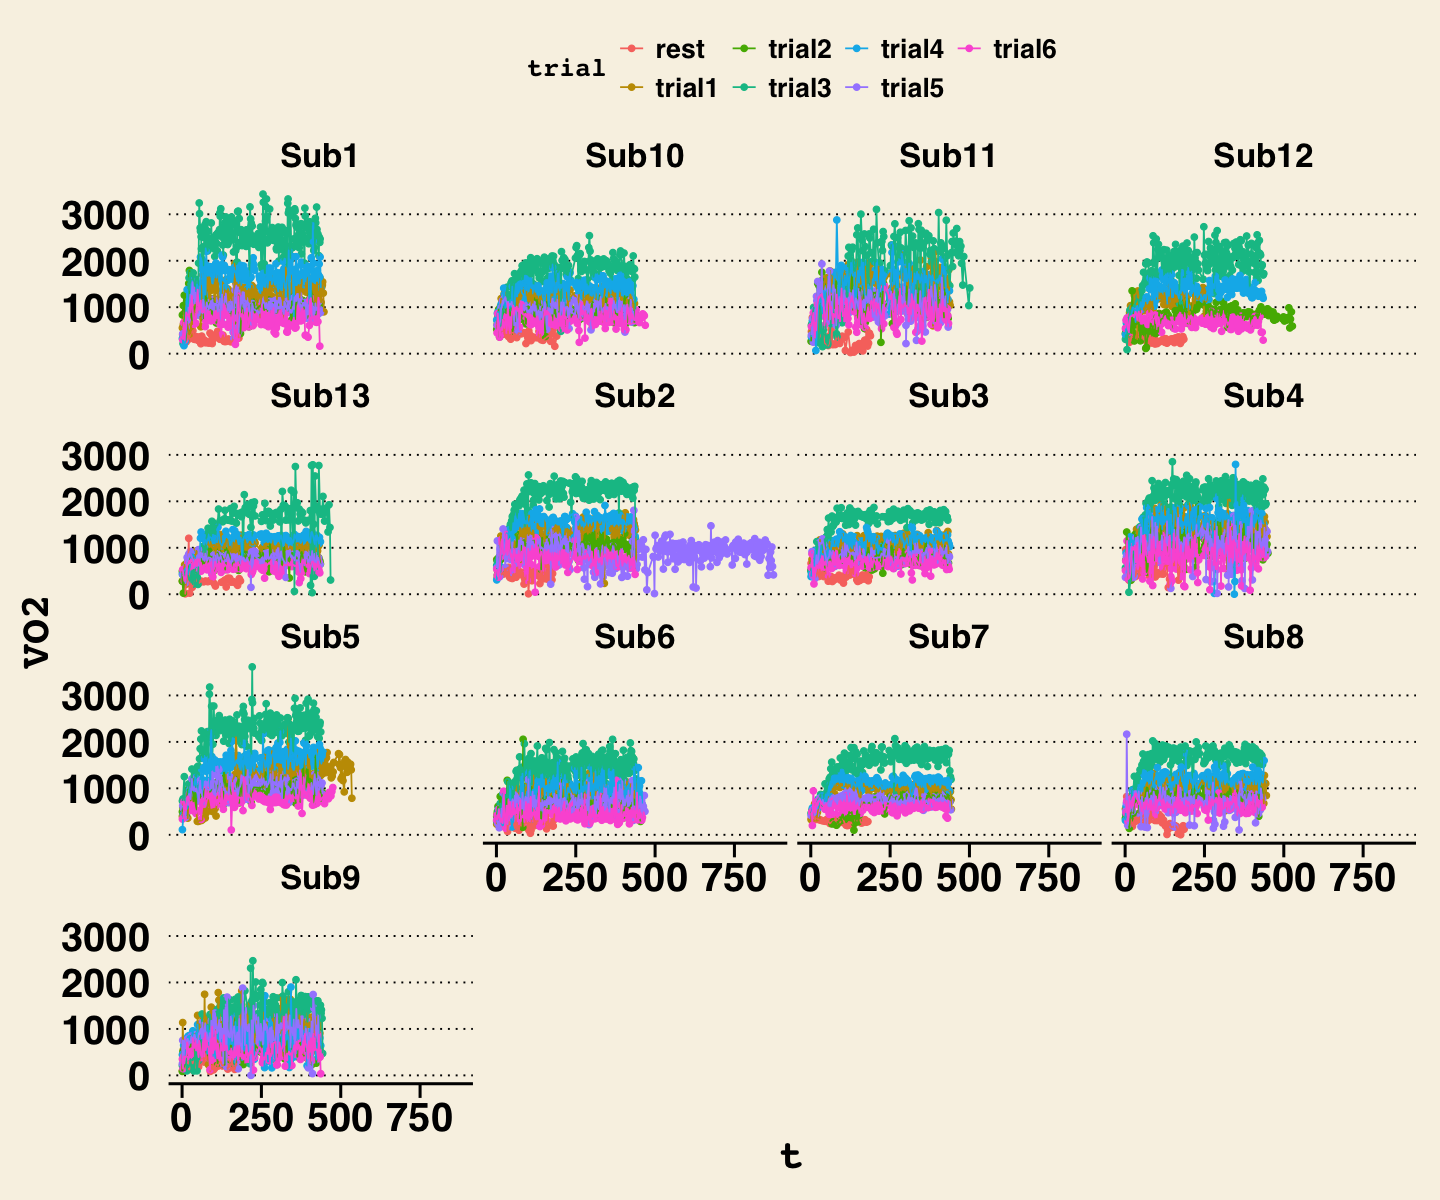

In [16]:
options(repr.plot.width = 12, repr.plot.height = 10)

#Visualize raw data by subject
ggplot(data.all,aes(x=t,y=VO2,color=trial))+
  geom_point()+
  geom_line()+
  facet_wrap(~Sub) + theme_wsj() + thm


### Smoothed traces across time for each trial per participant
In smoothing, we use a 'loess' procedure. This function is in-built within the geom_smooth function of ggplot. The 'loess' or 'lowess' procedure follows a kind of windowed smoothing procedure. It assigns weights to each point within the window, with closer points given higher weights, to calculate the smoothed value for each data point.

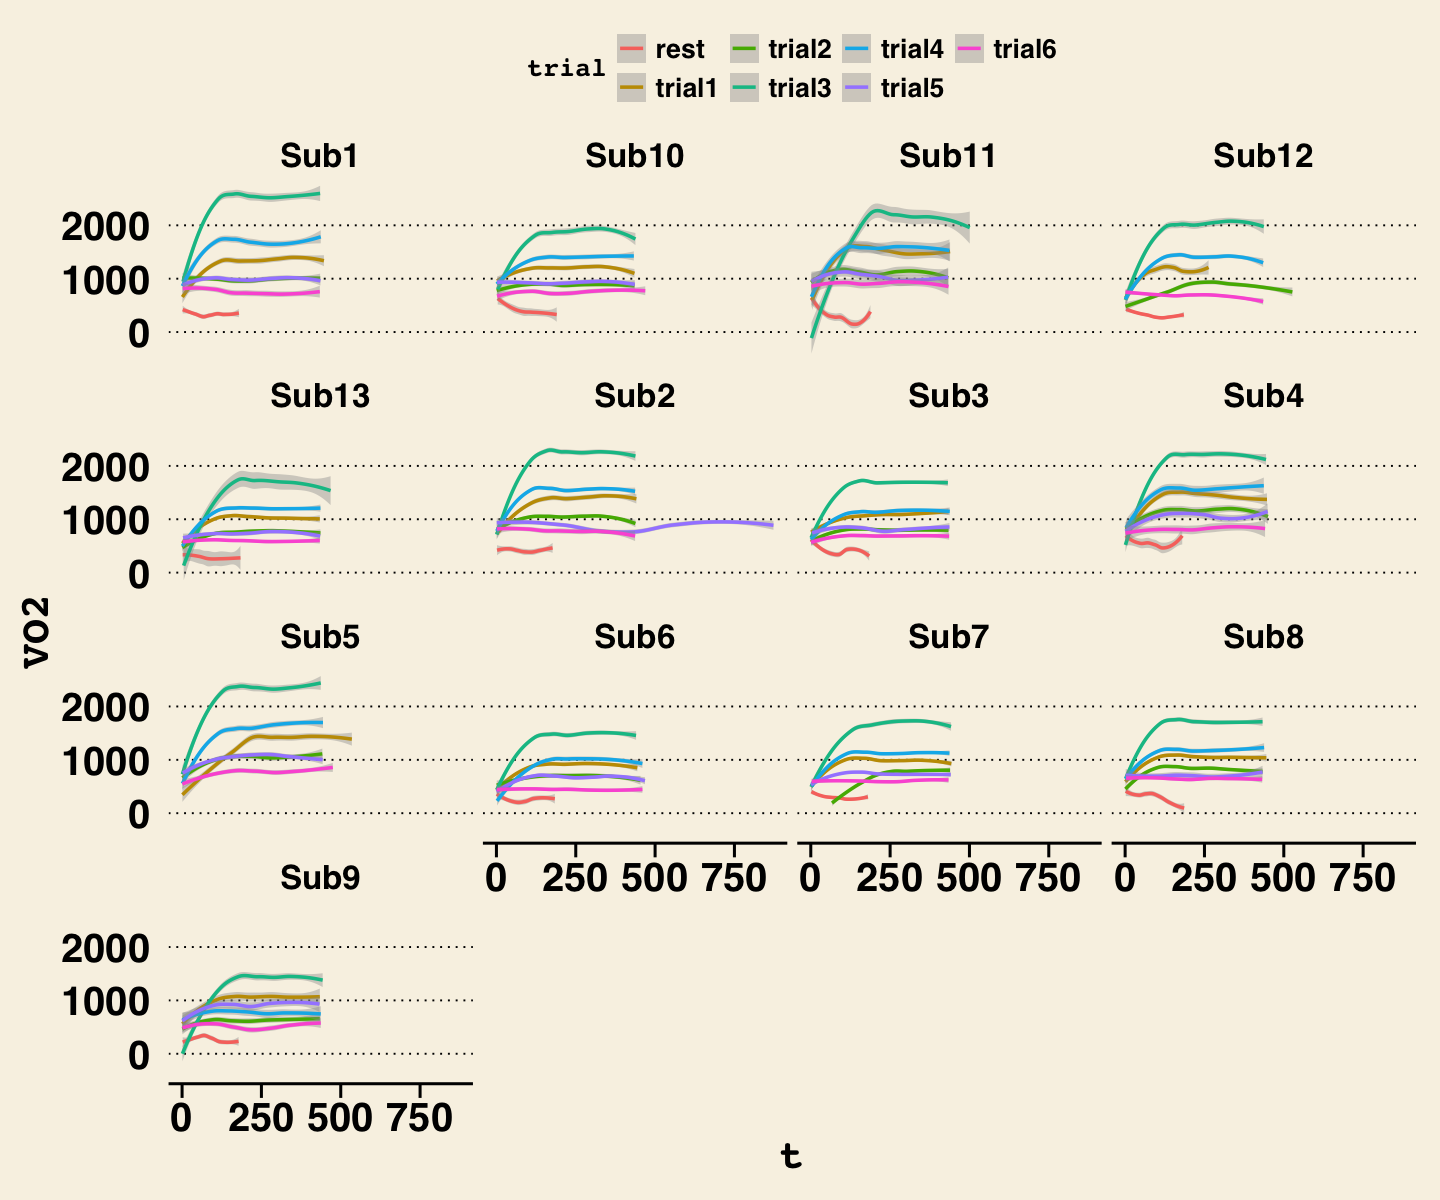

In [25]:
#Visualize data using loess by subject
ggplot(data.all,aes(x=t,y=VO2,color=trial))+
  geom_smooth(method = 'loess', formula = 'y~x')+
  facet_wrap(~Sub) + theme_wsj() + thm

### Each trial averaged across particpants

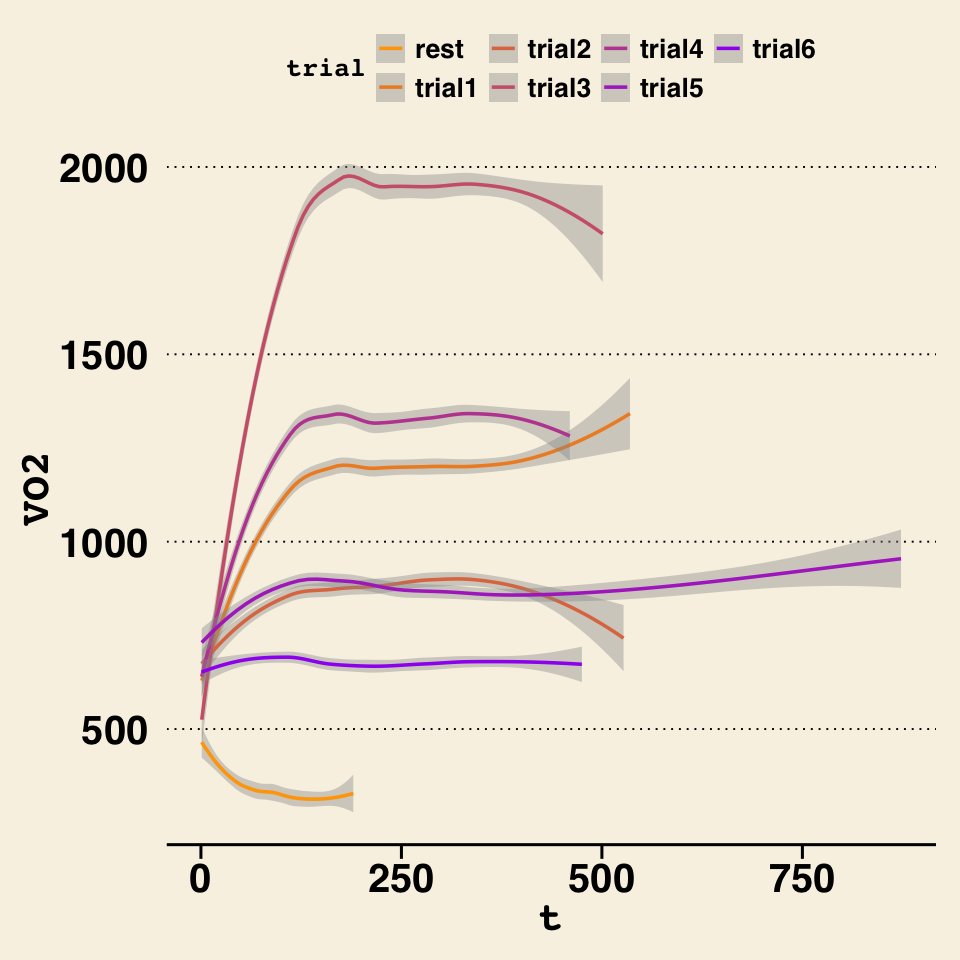

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)
#create a color gradient
colfunc <- colorRampPalette(c("orange", "purple"))
#Visualize each trial across all participants
ggplot(data.all,aes(x=t,y=VO2,color=trial))+
  geom_smooth(method = 'loess', formula = 'y~x')+
  scale_colour_manual(values = c(colfunc(7))) + theme_wsj() + thm

## The End